In [14]:
import numpy as np
import pandas as pd

data = pd.read_csv("time_series_covid19_confirmed_global.csv")
print(data.shape)
data.head()

(245, 68)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,22,22,22,24,24,40,40,74,84
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,51,55,59,64,70,76,89,104,123,146
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,54,60,74,87,90,139,201,230,264,302
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,2,39,39,53,75,88,113,133,164,188
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,1,2,2,3,3,3


In [15]:
italy_y = []
india_y = []

for j in range(4, 68): #These are the dates - on columns
    tempsum_italy = 0
    tempsum_india = 0
    for i in range(0, len(data)):
        if data.iloc[i, 1] == "Italy": #Check if the country is italy
            tempsum_italy = tempsum_italy + data.iloc[i, j]
        if data.iloc[i, 1] == "India": #Check if the country is India
            tempsum_india = tempsum_india + data.iloc[i, j]
    italy_y.append(tempsum_italy)
    india_y.append(tempsum_india)
print("italy cases up to 25/03/2020: {}".format(italy_y[len(italy_y) - 1]))
print("India cases up to 25/03/2020: {}".format(india_y[len(india_y) - 1]))
print(india_y)

italy cases up to 25/03/2020: 74386
India cases up to 25/03/2020: 657
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657]


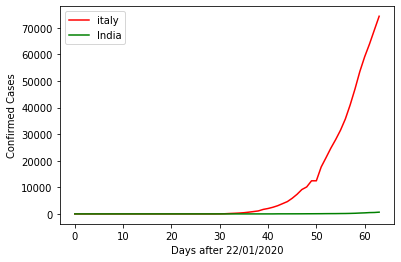

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657]


In [16]:
import matplotlib.pyplot as plt

plt.ylabel("Confirmed Cases")
plt.xlabel("Days after 22/01/2020")

plt.plot(italy_y, color='red', label='italy')
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()
print(india_y)

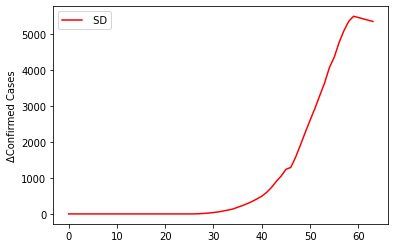

64

In [17]:
from scipy.signal import savgol_filter

deriv_italy = savgol_filter(italy_y, 9, 2, 1)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_italy, color='red', label=" SD")
plt.legend()
plt.show()
len(italy_y)

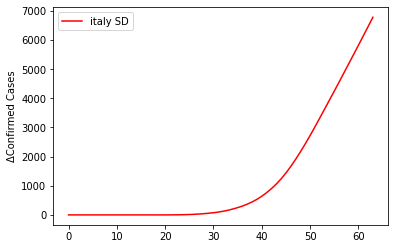

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657]


In [18]:
from scipy.signal import savgol_filter

deriv_italy = savgol_filter(italy_y, int(((len(italy_y))+1)/3), 2, 1) #Polynomial degree is 2 since the function should look like a parabola
deriv_italy = savgol_filter(deriv_italy, int((len(italy_y)+3)/5), 2, 0)

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_italy, color='red', label="italy SD")
plt.legend()
plt.show()
print(india_y)

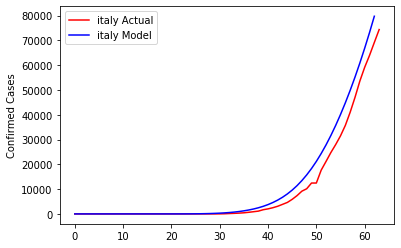

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 28, 30, 31, 34, 39, 43, 56, 62, 73, 82, 102, 113, 119, 142, 156, 194, 244, 330, 396, 499, 536, 657]


In [19]:
from scipy import integrate

italy_y_pred = integrate.cumtrapz(deriv_italy) 

plt.ylabel("Confirmed Cases")

plt.plot(italy_y, color='red', label="italy Actual")
plt.plot(italy_y_pred, color='blue', label='italy Model')
plt.legend()
plt.show()
print(india_y)

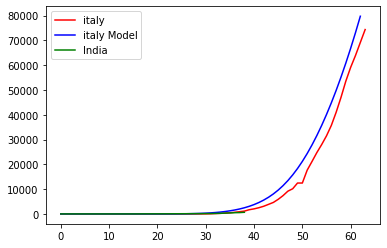

In [20]:
india_y = india_y[25:]
deriv_india = savgol_filter(india_y, 5, 2, 1)
deriv_india = savgol_filter(deriv_india, 9, 3, 0)

plt.plot(italy_y, color='red', label='italy')
plt.plot(italy_y_pred, color='blue', label="italy Model")
plt.plot(india_y, color='green', label='India')
plt.legend()
plt.show()

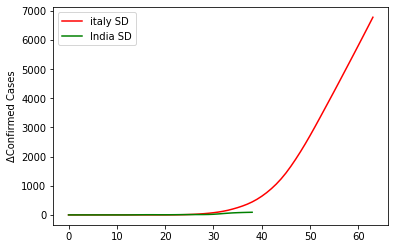

In [21]:
plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_italy, color='red', label='italy SD')
plt.plot(deriv_india, color='green', label='India SD')
plt.legend()
plt.show()

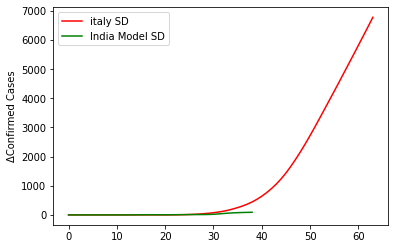

In [22]:
india_derv_model = savgol_filter(deriv_india, 19, 2, 0)
india_basic_model= []
for i in range(39):
    india_basic_model.append(deriv_india[i])

for i in range(39, len(india_derv_model)):
    india_basic_model.append(india_derv_model[i])

plt.ylabel("ΔConfirmed Cases")

plt.plot(deriv_italy, color='red', label="italy SD")
plt.plot(india_basic_model, color='green', label='India Model SD')
plt.legend()
plt.show()

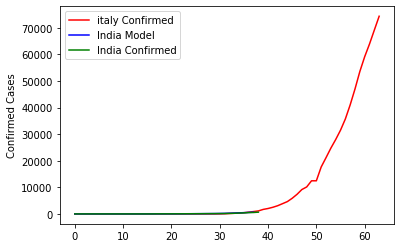

array([-1.08472856e-15, -1.05622370e-15, -3.76281325e-16,  6.05047653e-16,
        1.69278332e-15,  2.72312493e-15,  3.66681450e-15,  4.61050407e-15,
       -1.81818182e-02, -5.15151515e-02, -2.51082251e-01, -5.30519481e-01,
       -1.82034632e-01,  1.59870130e+00,  5.32056277e+00,  1.06982684e+01,
        1.67809524e+01,  2.27677489e+01,  2.80781385e+01,  3.27653680e+01,
        3.76110390e+01,  4.34558442e+01,  5.10699134e+01,  6.04463203e+01,
        7.10718615e+01,  8.24824675e+01,  9.42309524e+01,  1.06446753e+02,
        1.20493074e+02,  1.39177706e+02,  1.66808874e+02,  2.06746753e+02,
        2.59573593e+02,  3.23946104e+02,  3.97151840e+02,  4.76837951e+02,
        5.61543290e+02,  6.50151659e+02])

In [23]:
india_basic_model_confirmed = integrate.cumtrapz(india_basic_model)

plt.ylabel("Confirmed Cases")

plt.plot(italy_y, color='red', label='italy Confirmed')
plt.plot(india_basic_model_confirmed, color='blue', label='India Model')
plt.plot(india_y, color='green', label='India Confirmed')
plt.legend()
plt.show()
india_basic_model_confirmed

In [26]:
import time

predictions = pd.DataFrame(columns = ["Date", "Predicted Cases"])

start_pred = 1585180800
for i in range(57, len(india_basic_model_confirmed)):
    t = time.strftime('%d-%m-%Y', time.localtime(start_pred))
    pred = india_basic_model_confirmed[i]
    predictions.at[i-51, "Date"] = t
    predictions.at[i-51, "Predicted Cases"] = int(pred)
    start_pred = start_pred + 24*60*60
    
predictions

,Date,Predicted Cases
